# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Так как нам нужно выявить аномалии и тенденции рынка недвижимости, одной из основных задачей будет являтся исследования факторов влияющих на рыночную стоимость объекта недвижимости. Выявление таких факторов позволит построить автоматизированную систему: которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Задачи проекта:**

1. Предобработка данных с целью очистки таблиц от дубликатов, пропусков и аномальных значений;
1. Анализ рынка недвижимости Санкт-Петербурга и соседних населенных пунктов;
1. Исследования факторов влияющих на конечную стоимость объекта недвижимости;
1. Подсчет стоимости за квадратный метр в 10 самых популярных населенных пунктов;
1. Расчет стоимости каждого километра  от центра Санкт-Петербурга.




**Цель проекта:**

Выявления интересных аномалий и тенденций рынка недвижимости Санкт-Петербруга и соседних населенных пунктов.


Для удобства навигации по проекту снизу расположено его содержание.



# **Содержание:** <a id='intro'></a>
+ [**0. Описание данных**](#0)
+ [**1. Знакомства с данными**](#1)
    + [1.1 Приведение данных к нужным типам](#1.1)
+ [**2. Предобработка данных**](#2)
    + [2.1 График пропущенных значений](#2.1)
    + [2.2 Обработка пропусков столбца is_apartment](#2.2)
    + [2.3 Обработка пропусков столбца balcony](#2.3)5
    + [2.4 Обработка пропусков столбцов cityCenters_nearest и airports_nearest](#2.4)
    + [2.5 Обработка пропусков столбца celing_height](#2.5)
    + [2.6 График пропущенных значений после обработки пропусков](#2.6)
    + [2.7 Вывод к параграфу](#2.7)
+ [**3. Удаления неявных дубликатов**](#3)
+ [**4. Выявление аномальных значений**](#4)
+ [**5. Добавление новых столбцов**](#5)
    + [5.1 Столбец price_for_metre](#5.1)
    + [5.2 Столбцы weekday,month,year](#5.2)
    + [5.3 Столбец type_floor](#5.3)
    + [5.4 Столбец km_from_center](#5.4)
+ [**6. Изучение тенденций датасета**](#6)
    + [6.1 Графики: tototal_area,kitchen_area, living_area,ceiling_heigh](#6.1)
    + [6.2 График: rooms](#6.2)
    + [6.3 Графики: floor, floors_total](#6.3)
    + [6.4 График: type_floor](#6.4)
    + [6.5 График: last_price](#6.5)
    + [6.6 Графики: cityCenters_nearest,airports_nearest,parks_nearest](#6.6)
    + [6.7 График:first_day_exposition](#6.7)
    + [6.8 Графики: weekday,month](#6.8)
    + [6.9 График: days_exposition](#6.9)
    + [6.10 Вывод к параграфу](#6.10)
+ [**7. Анализ факторов влияющих на общую стоимость объекта**](#7)
    + [7.1 Зависимость цены от площади объекта](#7.1)
    + [7.2 Зависимость цены от количества комнат](#7.2)
    + [7.3 Зависимость цены от этажа](#7.3)
    + [7.4 Зависимость цены от даты публикации](#7.4)
    + [7.5 Вывод к параграфу](#7.5)
+ [**8. Подсчет цены за квадратный метр в 10 самых популярных населенных пунктах**](#8)
    + [8.1 Вывод к параграфу](#8.1)
+ [**9. Подсчет стоимости каждого километра в Санкт-Петербурге**](#9)
    + [9.1 Вывод к параграфу](#9.1)
+ [**10. Общий вывод**](#10)
+ [**11. Чек лист проекта**](#11)

**0. Описание данных** <a id='0'></a>    
+ **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
+ **balcony** — число балконов  
+ **ceiling_height** — высота потолков (м)  
+ **cityCenters_nearest** — расстояние до центра города (м)  
+ **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
+ **first_day_exposition** — дата публикации  
+ **floor** — этаж  
+ **floors_total** — всего этажей в доме  
+ **is_apartment** — апартаменты (булев тип)  
+ **kitchen_area** — площадь кухни в квадратных метрах (м²)  
+ **last_price** — цена на момент снятия с публикации  
+ **living_area** — жилая площадь в квадратных метрах (м²)  
+ **locality_name** — название населённого пункта  
+ **open_plan** — свободная планировка (булев тип)  
+ **parks_around3000** — число парков в радиусе 3 км  
+ **parks_nearest** — расстояние до ближайшего парка (м)  
+ **ponds_around3000** — число водоёмов в радиусе 3 км  
+ **ponds_nearest** — расстояние до ближайшего водоёма (м)  
+ **rooms** — число комнат  
+ **studio** — квартира-студия (булев тип)  
+ **total_area** — общая площадь квартиры в квадратных метрах (м²)  
+ **total_images** — число фотографий квартиры в объявлении  

# 1.Знакомство с данными<a id='1'></a>
([к содержанию](#intro))

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#%matplotlib inline
from datetime import datetime
pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#, decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

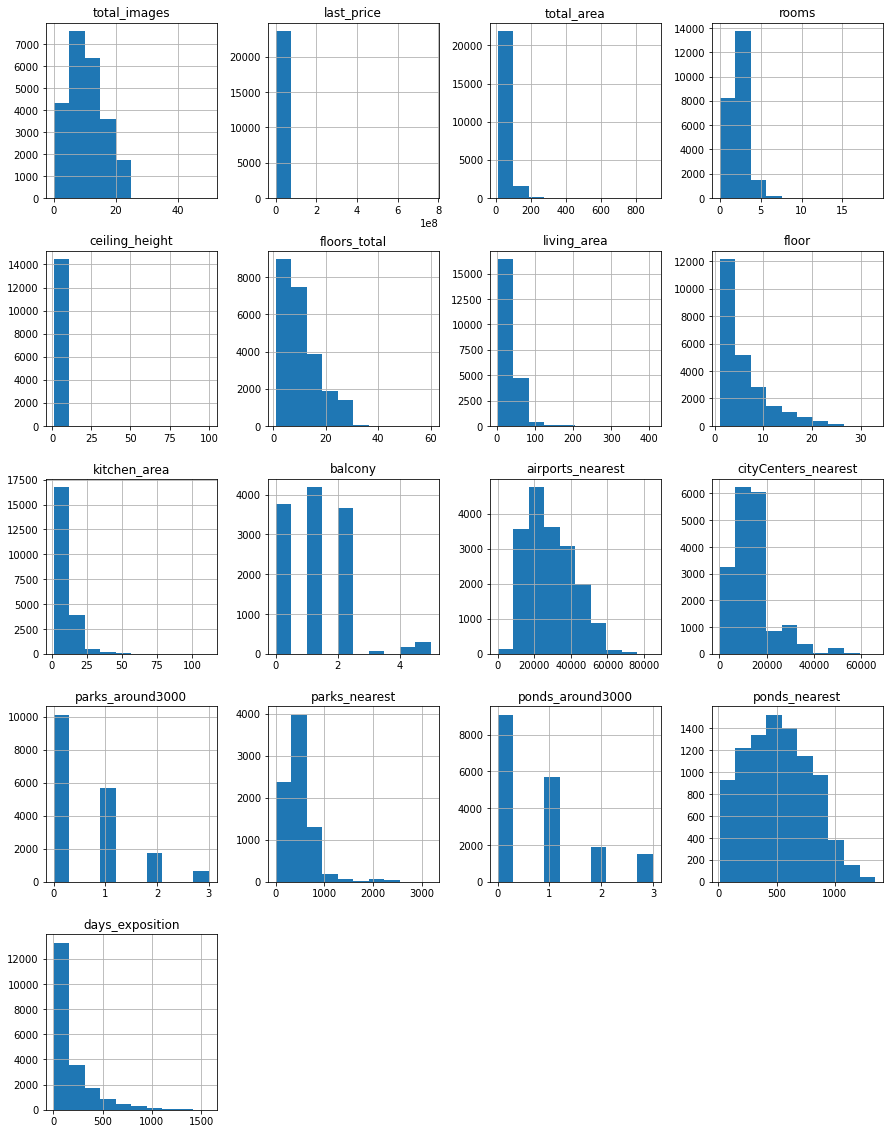

In [3]:
df.hist(figsize=(15, 20))
plt.show()

In [4]:
df.head(11)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Приведение данных к нужным типам** <a id='1.1'></a>
    
([к содержанию](#intro))

В первых 10 строках присутствует большое количество NAN.  
Для начала преобразуем столбцы в нужные нам типы данных для комфортного анализа в дальнейшем:  
+ **total_images** — оставляем как есть
+ **last_price** — Нужно привести к типу int, так как нецелесообразно вывод копеек в данном случае 
+ **total_area** — переводим к float64 и округляем до одного знака после запятой, так как в квадратуре квартиры важен каждый сантиметр 
+ **first_day_exposition** — Переводим в формат datetime  
+ **rooms** — оставляем как есть 
+ **ceiling_height** — высоту потолков по тому же принципу что и **total_area** переводим в float64 
+ **floors_total** — В Санкт-петербурге не наблюдается зданий с половинчатыми этажами, так что переводим в int 
+ **living_area** — по той же логике что и  **total_area** переводим в float64
+ **is_apartment** — переводим в bool, так как квартира либо является апартаментом либо нет 
+ **studio** — оставляем как есть
+ **open_plan** — оставляем как есть  
+ **kitchen_area** — по той же логике что и  **total_area** переводим в float64 
+ **balcony** — Переводим в int  
+ **airports_nearest**, **cityCenters_nearest**,**parks_around3000**,**ponds_around3000**,**ponds_nearest** - переводим в int, так как это метры
+ **days_exposition** - так как это дни переводим в int

| №   || Переводим в int  | Переводим в float и округдяем до 1 знака   | Оставляем как есть  | Переводив в datetime|
|:---  || :----: | :----: | :----: |:----: |
|**1** || **last_price**   | **total_area**    | **total_images**|**first_day_exposition**|
|**2** || **floors_total**   | **ceiling_height**    | **rooms**|
|**3** || **balcony**    | **living_area**    | **studio**|
|**4** ||**parks_around3000** | **kitchen_area**    | **open_plan**|
|**5** ||**ponds_around3000** |  **airports_nearest**       | 
|**6** || **ponds_nearest**    |  **cityCenters_nearest**    |  
|**7** || **days_exposition**  |     |

**Переводим first_day_exposition в datetime:**

In [5]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Переводим к нужным форматам данным:**

In [6]:
list_to_int = ['last_price','balcony','parks_around3000',
               'ponds_around3000', 'ponds_nearest',]
list_to_float = ['total_area','ceiling_height', 'living_area', 'kitchen_area','parks_nearest','floors_total','cityCenters_nearest','airports_nearest']

In [7]:
for column in list_to_int:
    df[column] = df[df[column].notnull()][column].convert_dtypes(int) 
#^^ Переводим все нужные нам столбцы в int и убираем ноль после запятой    
for column in list_to_float:
    df[column] = df[df[column].notnull()][column].astype(float).round(1)
#^^ Переводим все нужные нам столбцы в float и округляем до 1 знака после нуля    

In [8]:
df['last_price'] = (df['last_price'] / 1000)# переведем цены в тыс. для удобства отображения на графиках

In [9]:
df['days_exposition'] = df['days_exposition'].astype(float).round(0).convert_dtypes(int) 


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Посмотрим что у нас получилось:**

In [11]:
df.head(11)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,<NA>,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755,<NA>
1,7,3350.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,<NA>,81
2,10,5196.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574,558
3,0,64900.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234,424
4,2,10000.0,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,41.0,<NA>,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48,121
5,10,2890.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,9.1,<NA>,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,<NA>,55
6,6,3700.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,NaN,...,14.4,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,<NA>,155
7,5,7915.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,<NA>,<NA>
8,20,2900.0,33.2,2018-05-23,1,NaN,27.0,15.4,26,NaN,...,8.8,<NA>,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,<NA>,189
9,18,5400.0,61.0,2017-02-26,3,2.5,9.0,43.6,7,NaN,...,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,<NA>,289


# 2.Предобработка данных <a id='2'></a>    
([к содержанию](#intro))

Для удобства построим график пропущенных значений, для удобства восприятия количества проблемных столбцов

**График пропущенных значений** <a id='2.1'></a>

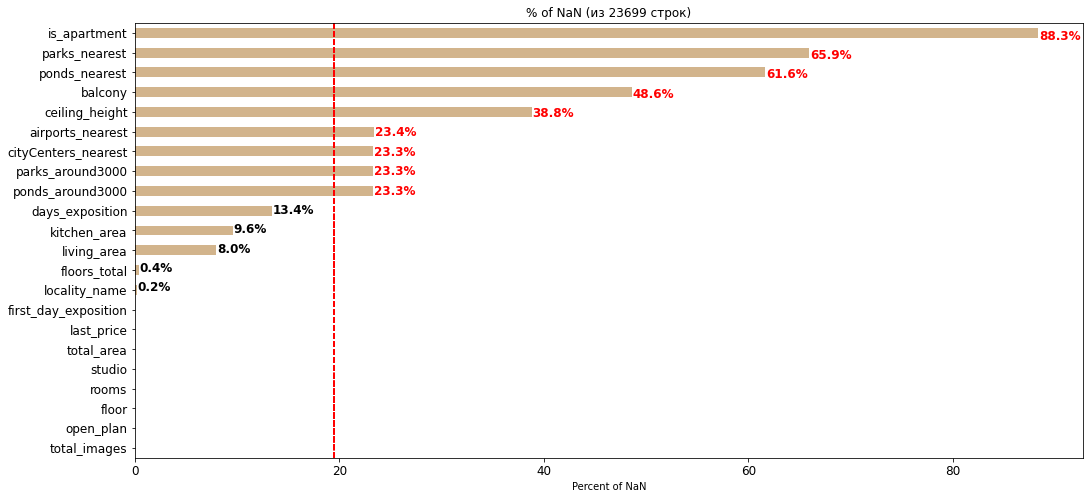

In [12]:
def percent_hbar(df):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(1)
    # ^^ Cчитаем процент для каждого столбца
    threshold = percent_of_nulls.mean()
    #^^ Выставляем порог по котору будем ориентироваться, при обработке пропусков
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из 23699 строк)', 
                               color='#D2B48C', legend=False, fontsize=12)
    ax.set_xlabel('Percent of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'black'
        if dict_percent[k] > 0: # разделям цветами те значения, которые ниже среднего значения
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i+0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i+= 0.98 # Выставляем проценты 
        ax.axvline(threshold, ls='--', color='r') # Выставляем линию по средним значениям
    return ax,threshold

plot, threshold = percent_hbar(df)


Как мы видим в нашей таблице чудовищное количество пропусков, так среднее значение колеблится около 20 %, а 9 из столбцов имеют больше среднего количество пропусков. Посмотрим, что с этим можно сделать.


*   **Is_apartment(88,3 %)** - данный столбец заполнялся пользователям, предполагаю что данный пункт был необязательным при заполнении объявления, а многие клиенты не знают чем отличаются квартиры от апартаментов. Соответственно пользователи не заполняли данный пункт если выставляли квартиру, а не апартаменты, так что заменим все пропущенные значения на False;
*   **balcony(48,6%)** - пропуски в этом столбце имеют то же происхождение, что и в случае со столбцом is_apartment, заполним пропуски значением 0 в дальнейшем посоветую выставлять эти пункты как обязательные, тогда получится избежать такого большого количества пропусков.
*   **ceiling_height(38,8%)** - В данном случае хоть и в каждом доме своя высота потолков, предлагаю предположить что в историчесокм центре Санкт-Петербурге потолки выше, нежели чем в новостройках например в Мурино. Поэтому предлагаю рассчитать среднюю потолков по отдаленности от центра и заполнить пропуски по этим значениям. Однако для начала нам потребуется заполнить пропуски в столбцах cityCenters_nearest и airports_nearest, для получения отдалености от центра по каждому населеному пункту.
*   **airports_nearest(23,4%), cityCenters_nearest(23,3%)** - Скорее всего алгоритм при подсчете расстояния дал сбой, эта гипотеза подтверждается и потому что количество прпоусков в этих двух столбцах практически индентиченое. Заполним мы эти пропуски с помощью API Геокодера Яндекс.
*   **park_nearest(65,9%),ponds_nearest(61,6%)** - Скорее всего также произошел сбой или данные не были выгружены, так как эти данные не сильно влияют на наши поставленные задачи в исследовании оставим их не заполненными, однако в следующий раз стоит запросить эти информацию.
*  **parks_around3000(23,3%),ponds_around3000(23,3%)** - так как данные в этих столбцах зависят от park_nearest,ponds_nearest так же не будем их трогать




**Проработаем пропуски столбца is_apartment:** <a id='2.2'></a>

([к содержанию](#intro))

In [93]:
print('Количество пропусков:',df['is_apartment'].isnull().sum())

Количество пропусков: 0


In [14]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [15]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [94]:
print('Количество пропусков:',df['is_apartment'].isnull().sum())

Количество пропусков: 0


**Проработаем пропуски столбца _balcony_:**<a id='2.3'></a>

([к содержанию](#intro))

In [92]:
print('Количество пропусков:',df['balcony'].isnull().sum())

Количество пропусков: 0


In [18]:
df['balcony'] = df['balcony'].fillna(0.0)
df['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: Int64

In [95]:
print('Количество пропусков:',df['balcony'].isnull().sum())

Количество пропусков: 0


**Для начало проработаем пропуски в столбцax c cityCenters_nearest и airports_nearest так как столбец ceiling_heights мы будем заполнять по данным столбцам:** <a id='2.4'></a>

([к содержанию](#intro))

Проверим нащу гипотезу относительно количества пропусках в обоих столбцах:

In [20]:
print('Количество пропусков  в cityCenters_nearest:',df['cityCenters_nearest'].isnull().sum())
print('Количество пропусков  в airports_nearest:',df['airports_nearest'].isnull().sum())

Количество пропусков  в cityCenters_nearest: 5519
Количество пропусков  в airports_nearest: 5542


Как мы видим количество пропусков почти равно, посмотрим где эти пропуски встречаются вместе

In [21]:
print('Количество пропусков попарно:',df.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest').shape[0])

Количество пропусков попарно: 5518


Наша гипотеза скорее всего подтверждается, был сбой при котором алгоритм не выдал расстояние от квартиры до центра и аэропорта. Создадим лист с населеными пунктами где были не указаны расстояния.

In [22]:
list_of_cities_NaN_airport_center = df.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest')['locality_name'].unique()
list_of_cities_NaN_airport_center

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Теперь С помощью Геокодера от Яндекса присвоим этим населенным пунктам координаты для дальнейшего расчета расстояния:

In [23]:
import requests as r
url = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=a5ce8de5-0438-490d-b625-b31839984e5b&geocode='
coordinates = []

for city in list_of_cities_NaN_airport_center:
    if city == city: # чтоб не столкнуться с nan
        url_formatted = url + 'Ленинградская область ' + city
        response = r.get(url_formatted).json()
        
        point  = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
        coordinate = (float(point.split()[1]), float(point.split()[0]))
        coordinates.append(coordinate)
    else:
        coordinates.append('')


In [24]:
cities_with_NaN_airport_center = pd.DataFrame({'Город':list_of_cities_NaN_airport_center, 'Координаты':coordinates})
cities_with_NaN_airport_center.head()

,Город,Координаты
0,городской посёлок Янино-1,"(59.94814, 30.560524)"
1,посёлок Мурино,"(60.051284, 30.438578)"
2,Сертолово,"(60.143531, 30.217179)"
3,деревня Кудрово,"(59.908489, 30.513578)"
4,Коммунар,"(59.621609, 30.393483)"


Проверим допустил ли наш алгоритм прокол:

In [25]:
cities_with_NaN_airport_center.isnull().sum()

Город         1
Координаты    0
dtype: int64

In [26]:
cities_with_NaN_airport_center.query('Координаты == ""')

,Город,Координаты
130,NaN,


Дропнем этот город

In [27]:
cities_with_NaN_airport_center = cities_with_NaN_airport_center.dropna().reset_index(drop=True)
cities_with_NaN_airport_center.isnull().sum()


Город         0
Координаты    0
dtype: int64

Определяем координаты аэропорта Пулкова и центра Санкт-Петербурга

In [28]:
centre_coordinates = (59.946216, 30.311475)
airport_coordinates = (59.7998772, 30.2733421)

Устанавливаем geopy для определения дистанции по координатам

In [29]:
!pip install geopy

     |████████████████████████████████| 119 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 4.9 MB/s eta 0:00:011


In [30]:
from geopy import distance
cities_with_NaN_airport_center['cityCenters_nearest'] = cities_with_NaN_airport_center['Координаты'].apply(
                                                        lambda x: distance.distance(x, centre_coordinates).m)
cities_with_NaN_airport_center['airports_nearest'] = cities_with_NaN_airport_center['Координаты'].apply(
                                                        lambda x: distance.distance(x, airport_coordinates).m)

cities_with_NaN_airport_center.head()


,Город,Координаты,cityCenters_nearest,airports_nearest
0,городской посёлок Янино-1,"(59.94814, 30.560524)",13920.724258,23056.229206
1,посёлок Мурино,"(60.051284, 30.438578)",13686.938457,29494.466883
2,Сертолово,"(60.143531, 30.217179)",22602.725555,38415.349605
3,деревня Кудрово,"(59.908489, 30.513578)",12058.334158,18102.532766
4,Коммунар,"(59.621609, 30.393483)",36456.127015,20980.070039


Создадим словари с расстоянием до центра и аэропорта для заполнения пропусков в нашем исходном датасете

In [31]:
cityCenters_nearest_dict = dict(pd.Series(cities_with_NaN_airport_center['cityCenters_nearest'].values,
                                index=cities_with_NaN_airport_center['Город'].values))
airports_nearest_dict = dict(pd.Series(cities_with_NaN_airport_center['airports_nearest'].values,
                                index=cities_with_NaN_airport_center['Город'].values))

In [32]:
df.loc[df['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] =df['locality_name'].map(cityCenters_nearest_dict)
df.loc[df['airports_nearest'].isnull(), 'airports_nearest'] = df['locality_name'].map(airports_nearest_dict)


In [33]:
df[df['locality_name'] != 'Санкт-Петербург'][['locality_name', 'cityCenters_nearest', 'airports_nearest']].head(10)

,locality_name,cityCenters_nearest,airports_nearest
1,посёлок Шушары,18603.000000,12817.000000
5,городской посёлок Янино-1,13920.724258,23056.229206
6,посёлок Парголово,19143.000000,52996.000000
8,посёлок Мурино,13686.938457,29494.466883
11,Ломоносов,51677.000000,48252.000000
12,Сертолово,22602.725555,38415.349605
13,Петергоф,33058.000000,37868.000000
14,Пушкин,30759.000000,20782.000000
20,посёлок Парголово,19311.000000,53134.000000
22,деревня Кудрово,12058.334158,18102.532766


In [34]:
print('Количество пропусков  в cityCenters_nearest:',df['cityCenters_nearest'].isnull().sum())
print('Количество пропусков  в airports_nearest:',df['airports_nearest'].isnull().sum())

Количество пропусков  в cityCenters_nearest: 9
Количество пропусков  в airports_nearest: 8


Как мы видим количетсво пропусков стало мизерным по сравнению с тем что было. Теперь вернемся к заполнению пропусков в ceiling_heights

**Проработаем пропуски в celing_height:**<a id='2.5'></a>

([к содержанию](#intro))

In [96]:
print('Количество пропусков:',df['ceiling_height'].isnull().sum())

Количество пропусков: 9


Перед групировкой данных относительно отдалености от цнетра проверим наши данные на аномальные значения так как это может вызвать серьезные нарушение при выявление средней 

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475,5.682529,0.00,6.0,9.000000,14.00,50.000000
last_price,23699.0,6541.548772,10887.013268,12.19,3400.0,4650.000000,6800.00,763000.000000
total_area,23699.0,60.348635,35.654086,12.00,40.0,52.000000,69.90,900.000000
rooms,23699.0,2.070636,1.078405,0.00,1.0,2.000000,3.00,19.000000
ceiling_height,14504.0,2.775717,1.260951,1.00,2.5,2.600000,2.80,100.000000
floors_total,23613.0,10.673824,6.597173,1.00,5.0,9.000000,16.00,60.000000
living_area,21796.0,34.457878,22.030420,2.00,18.6,30.000000,42.30,409.700000
floor,23699.0,5.892358,4.885249,1.00,2.0,4.000000,8.00,33.000000
kitchen_area,21421.0,10.569754,5.905448,1.30,7.0,9.100000,12.00,112.000000
balcony,23699.0,0.591080,0.959298,0.00,0.0,0.000000,1.00,5.000000


Вряд ли в Санкт-Петербурге, кто-то построил себе хоромы со 100 метровыми потолками, возможно здесь человек ошибся нулем, хотя в 10 метровые потолки тоже не особо верится посмотрим какие еще значения выбиваются 

In [37]:
df.query('ceiling_height >=10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,27143.994528,43404.818448,<NA>,NaN,<NA>,<NA>,259
3148,14,2900.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,117084.653223,114271.367995,<NA>,NaN,<NA>,<NA>,<NA>
4643,0,4300.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.000000,13256.000000,1,658.0,1,331,181
4876,7,3000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,2,посёлок Мурино,29494.466883,13686.938457,<NA>,NaN,<NA>,<NA>,28
5076,0,3850.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.000000,8389.000000,3,397.0,1,578,7
5246,0,2500.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,42649.150990,58574.278554,<NA>,NaN,<NA>,<NA>,540
5669,4,4400.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.000000,10912.000000,1,305.0,0,<NA>,267
5807,17,8150.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.000000,20444.000000,0,NaN,3,80,38
6246,6,3300.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68923.000000,50649.000000,1,417.0,2,73,<NA>
9379,5,3950.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,Санкт-Петербург,11647.000000,13581.000000,0,NaN,0,<NA>,<NA>


Всего у нас 25 таких значений, скорее всего пользователи ошиблись на ноль поэтому разделим все выбивающиеся значения на 10, однако квартиру с потолком 100 метров и 10,3 я предлагаю удалить, так как вряд ли существует квартира со 10 метровыми потолками стоимостью 15 млн рублей площадью 25 метров, и потолков 1,3 метра я тоже не встречал.


In [38]:
df = df[(df['ceiling_height'] != 10.3)&(df['ceiling_height'] != 100)]
df.query('ceiling_height >=10')
        

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,27143.994528,43404.818448,<NA>,NaN,<NA>,<NA>,259
3148,14,2900.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,117084.653223,114271.367995,<NA>,NaN,<NA>,<NA>,<NA>
4643,0,4300.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.000000,13256.000000,1,658.0,1,331,181
4876,7,3000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,2,посёлок Мурино,29494.466883,13686.938457,<NA>,NaN,<NA>,<NA>,28
5076,0,3850.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.000000,8389.000000,3,397.0,1,578,7
5246,0,2500.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,42649.150990,58574.278554,<NA>,NaN,<NA>,<NA>,540
5669,4,4400.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.000000,10912.000000,1,305.0,0,<NA>,267
5807,17,8150.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.000000,20444.000000,0,NaN,3,80,38
6246,6,3300.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68923.000000,50649.000000,1,417.0,2,73,<NA>
9379,5,3950.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,Санкт-Петербург,11647.000000,13581.000000,0,NaN,0,<NA>,<NA>


In [39]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x/10 if x>10 else x)
df.query('ceiling_height >=10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**Убрали аномальные значения теперь проверим нашу гипотезу:**

Для того что бы заполнить столбцы в колонке ceiling_heights, предлагаю расчитать среднее значение данного параметра оттакливаясь от отдаленности нахождение объекта от центра. Так как в Санкт-Петербурге в историческом центре потолки зачастую выше нежели чем например в Мурино, из-за исторической застройки. Плюс к тому почти в каждом городе чем дальше жилье от центра тем меньше, там потолки проверим гипотезу на имеющихся у нас данных из нашего датасета.
Для этого сгруппируем данные следующим образом:

1.   0-3 км. Самый центр города
2.   3-5 км. центр города
3.   5-17 км. В черте города
4.   больше 17 км. Квартира находиться за КАДом


In [40]:
def Distance_from_center(row):
    if row['cityCenters_nearest'] < 3000:
        return 'самый центр города'
    elif row['cityCenters_nearest'] < 5000:
        return 'центр города'
    elif row['cityCenters_nearest'] < 17000:
        return 'в пределах города'
    elif row['cityCenters_nearest'] >= 17000:
        return 'за Кадом'


In [41]:
df['Distance_from_center'] = df.apply(Distance_from_center, axis = 1)

In [42]:
df.groupby('Distance_from_center')['ceiling_height'].mean().sort_values(ascending=False).to_frame()

,ceiling_height
Distance_from_center,
самый центр города,3.217975
центр города,3.133369
в пределах города,2.708164
за Кадом,2.641825


**Как мы видим наша гипотеза подтверждается чем дальше квартира находится от центра Санкт-Петербурга тем ниже в ней потолки:**


In [43]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,Distance_from_center
0,20,13000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.000000,16028.000000,1,482.0,2,755,<NA>,в пределах города
1,7,3350.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817.000000,18603.000000,0,NaN,0,<NA>,81,за Кадом
2,10,5196.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.000000,13933.000000,1,90.0,2,574,558,в пределах города
3,0,64900.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.000000,6800.000000,2,84.0,3,234,424,в пределах города
4,2,10000.0,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.000000,8098.000000,2,112.0,1,48,121,в пределах города
5,10,2890.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0,городской посёлок Янино-1,23056.229206,13920.724258,<NA>,NaN,<NA>,<NA>,55,в пределах города
6,6,3700.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,1,посёлок Парголово,52996.000000,19143.000000,0,NaN,0,<NA>,155,за Кадом
7,5,7915.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,2,Санкт-Петербург,23982.000000,11634.000000,0,NaN,0,<NA>,<NA>,в пределах города
8,20,2900.0,33.2,2018-05-23,1,NaN,27.0,15.4,26,False,...,0,посёлок Мурино,29494.466883,13686.938457,<NA>,NaN,<NA>,<NA>,189,в пределах города
9,18,5400.0,61.0,2017-02-26,3,2.5,9.0,43.6,7,False,...,2,Санкт-Петербург,50898.000000,15008.000000,0,NaN,0,<NA>,289,в пределах города


In [44]:
df['ceiling_height'] = df.groupby('Distance_from_center')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

**Посмотрим что у нас получилось:**

In [97]:
print('Количество пропусков:',df['ceiling_height'].isnull().sum())

Количество пропусков: 9


**Посмотрим как изменился наш график по процентам пропусков во всем датасете:** <a id='2.6'></a>

([к содержанию](#intro))

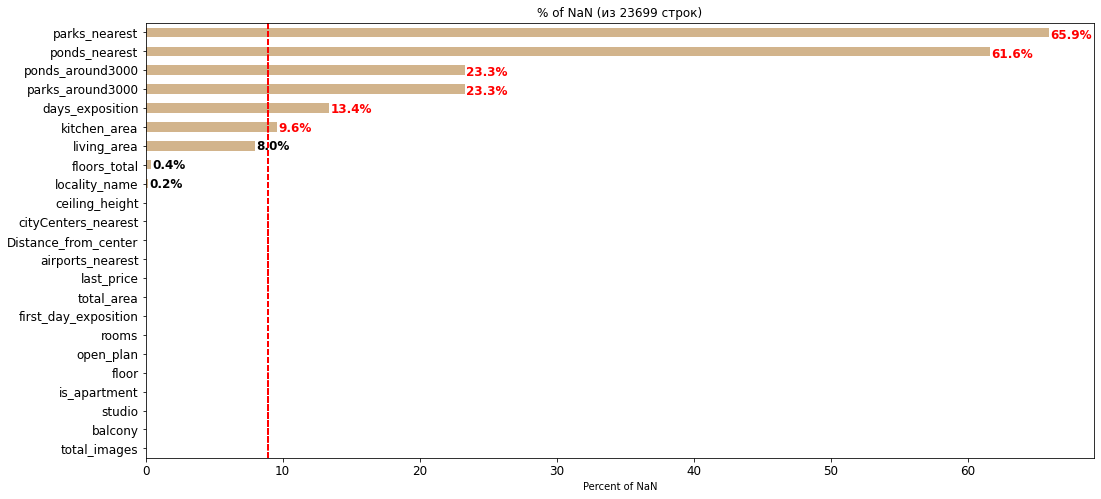

In [46]:
plot, threshold = percent_hbar(df)

**Вывод по параграфу:**<a id='2.7'></a>

([к содержанию](#intro))

Нам получилось существено снизить среднее количество пропусков с **20 %** до **9 %**, также мы полностью избавились от пропусков в столбцах:
 * **is_apartment**
 * **balcony**
 * **cityCenters_nearest**
 * **airports_nearest**
 * **ceiling_height**

Не получилось избавиться от пропусках в столбцах **parks_nearest** и **ponds_nearest** и связанными с ними столбцами **parks_nearest,ponds_nearest** так как пропуски в этих столбцах не сильно повлияют на цели нашего исследования. 
Так же стоит уточнить насчет пропусков в столбцах связанной с площадью, такими как **kitchen_area, living_area** пропуски в данном случае мы не можем заполнить средним значением, так как метраж у всех квартир разный  кроме того высчитать площидб тоже не получится, так как есть столбцы где пропущены оба значения к тому же мы не знаем площадь балконов, которые могут быть и по 10 метров, так что оставим эти пропуски.

# 3. Удаление неявных дубликатов<a id='3'></a>

([к содержанию](#intro))

Удалим неявные дубликаты в столбце locality_name, так как мы получили координаты и заполнили пропущенные значение можем удалить неявные дубликаты в данном столбце

In [47]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Как мы видим в данном столбце очень много неочевидных дубликатов, например: Мурино и поселок Мурино, для удаления данных дубликатов воспользуемся функцией replace и уберем лишние значения такие как: поселок, деревня, село и т.д

In [99]:
print('Количество неявных дубликатов:',df['locality_name'].nunique())

Количество не явных дубликатов: 319


In [49]:
df['locality_name'] = df['locality_name'].str.replace('городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('посёлок', '')
df['locality_name'] = df['locality_name'].str.replace('поселок', '')
df['locality_name'] = df['locality_name'].str.replace('деревня', '')
df['locality_name'] = df['locality_name'].str.replace('село', '')
df['locality_name'] = df['locality_name'].str.strip()
df['locality_name'] = df['locality_name'].str.lower()


In [50]:
df['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'городской  янино-1', 'парголово',
       'мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'кудрово', 'коммунар', 'колпино', 'красный бор', 'гатчина',
       'фёдоровское', 'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое товарищество новая ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'красное село',
       'понтонный', 'сясьстрой', 'старая', 'лесколово', 'новый свет',
       'сланцы', 'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тос

In [101]:
print('Количество неявных дубликатов:',df['locality_name'].nunique())

Количество неявных дубликатов: 319


Как видим мы удалили 45 неявных дубликатов.

# 4. Выявление аномальных значений<a id='4'></a>

([к содержанию](#intro))

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23697.0,9.858463,5.682026,0.00,6.0,9.000000,14.000000,50.000000
last_price,23697.0,6541.244222,10887.331051,12.19,3400.0,4650.000000,6800.000000,763000.000000
total_area,23697.0,60.350774,35.654712,12.00,40.0,52.000000,69.900000,900.000000
rooms,23697.0,2.070726,1.078406,0.00,1.0,2.000000,3.000000,19.000000
ceiling_height,23688.0,2.726992,0.244082,1.00,2.6,2.700000,2.708164,8.300000
floors_total,23611.0,10.673838,6.597258,1.00,5.0,9.000000,16.000000,60.000000
living_area,21794.0,34.459686,22.030621,2.00,18.6,30.000000,42.300000,409.700000
floor,23697.0,5.892012,4.885094,1.00,2.0,4.000000,8.000000,33.000000
kitchen_area,21420.0,10.569734,5.905585,1.30,7.0,9.100000,12.000000,112.000000
balcony,23697.0,0.590919,0.958903,0.00,0.0,0.000000,1.000000,5.000000


До этого мы выявели и удалили аномальные значения в ceiling_height, теперь стоит обратить внимание на квартиру с 19 комнатами, и площадью 900 метров, потому что эти значения выбиваются из общей картины.

In [53]:
df.query('total_area > 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,Distance_from_center
3117,19,140000.0,631.0,2019-03-30,7,3.133369,5.0,NaN,5,False,...,0,санкт-петербург,25707.0000,4972.0,0,NaN,2,210,<NA>,центр города
4237,1,50000.0,517.0,2017-10-14,7,3.217975,4.0,332.0,3,False,...,0,санкт-петербург,22835.0000,1847.0,2,477.0,2,540,<NA>,самый центр города
5358,20,65000.0,590.0,2019-02-14,15,3.500000,6.0,409.0,3,False,...,0,санкт-петербург,24447.0000,4666.0,1,767.0,0,<NA>,14,центр города
8018,20,84000.0,507.0,2015-12-17,5,4.400000,7.0,301.5,7,True,...,1,санкт-петербург,15692.6665,5735.0,2,110.0,0,<NA>,1078,в пределах города
12859,20,140000.0,631.2,2019-04-09,7,3.900000,4.0,322.3,4,False,...,1,санкт-петербург,25707.0000,4972.0,0,NaN,2,210,<NA>,центр города
15651,20,300000.0,618.0,2017-12-18,7,3.400000,7.0,258.0,5,False,...,0,санкт-петербург,32440.0000,5297.0,0,NaN,2,198,111,в пределах города
19540,8,420000.0,900.0,2017-12-06,12,2.800000,25.0,409.7,25,False,...,0,санкт-петербург,30706.0000,7877.0,0,NaN,2,318,106,в пределах города


Как мы видим тут нет никаких аномальных значений просто кто то продает квартиру почти в 500 миллионов рублей. Так что оставим эти квартиры, единственно странно что все равно в этом списке нет квартиры с 19 комнатами

In [102]:
fig = px.box(df, y = 'rooms',
            labels={'rooms':'Количество комнат'})
fig.show()

In [55]:
df.query('rooms > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,Distance_from_center
648,3,17500.0,183.7,2018-07-01,11,3.400000,7.0,138.8,7,False,...,0,санкт-петербург,23606.0,3148.0,0,NaN,0,<NA>,<NA>,центр города
813,7,16500.0,229.0,2016-02-25,8,3.133369,6.0,160.0,5,False,...,0,санкт-петербург,23968.0,4536.0,1,243.0,0,<NA>,806,центр города
866,5,25000.0,363.0,2017-12-23,14,3.200000,5.0,222.0,4,False,...,0,санкт-петербург,38076.0,7950.0,0,NaN,2,435,418,в пределах города
4149,6,23000.0,272.6,2018-01-11,10,3.100000,7.0,145.9,7,False,...,1,санкт-петербург,10726.0,12169.0,1,191.0,1,531,<NA>,в пределах города
4435,13,22190.0,191.2,2017-12-05,8,2.900000,6.0,115.8,1,False,...,0,санкт-петербург,21589.0,1152.0,1,587.0,2,155,115,самый центр города
5358,20,65000.0,590.0,2019-02-14,15,3.500000,6.0,409.0,3,False,...,0,санкт-петербург,24447.0,4666.0,1,767.0,0,<NA>,14,центр города
7857,11,150000.0,230.0,2017-10-25,8,2.708164,8.0,220.0,8,False,...,0,санкт-петербург,25525.0,5845.0,2,116.0,0,<NA>,135,в пределах города
8758,5,16100.0,150.0,2018-07-10,8,2.900000,5.0,107.0,1,False,...,0,санкт-петербург,26080.0,4782.0,2,473.0,0,<NA>,<NA>,центр города
8822,14,49968.9,398.0,2017-07-12,9,3.000000,2.0,160.1,1,False,...,0,санкт-петербург,17720.0,16722.0,3,471.0,2,440,471,в пределах города
8860,12,17000.0,235.0,2018-07-14,9,3.000000,6.0,NaN,3,False,...,0,санкт-петербург,24466.0,5034.0,1,346.0,0,<NA>,90,в пределах города


Допустим, что возможно это бывшие комунальные квартиры,которые продают уже целиком

# 5.Добавление новых столбцов<a id='5'></a>

([к содержанию](#intro))


**Высчитываем цену за метр:**<a id='5.1'></a>


In [103]:
df['price_for_metre'] = ((df['last_price']*1000) / df['total_area']).astype('int')
df['price_for_metre']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72496
23695     52542
23696     44091
23697    149414
23698     41795
Name: price_for_metre, Length: 23697, dtype: int64

**Добавляем информацию о дне недели, месяце и года:**<a id='5.2'></a>

([к содержанию](#intro))

In [57]:
df['weekday'] = df['first_day_exposition'].dt.weekday 
df['month'] = df['first_day_exposition'].dt.month 
df['year'] = df['first_day_exposition'].dt.year 


**Сделаем функцию для определения типа этажа:**<a id='5.3'></a>

([к содержанию](#intro))

In [58]:
def type_floor (row):
    if row['floor'] == 1:
        return 'Первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

In [59]:
df['type_floor'] = df.apply(type_floor, axis = 1)

**Переведем растояние до центра в км:**<a id='5.4'></a>

([к содержанию](#intro))

In [60]:
df['km_from_center'] = (df['cityCenters_nearest'] / 1000).round(0)
df['km_from_center']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695    55.0
23696    72.0
23697    10.0
23698    50.0
Name: km_from_center, Length: 23697, dtype: float64

# 6.Изучение тенденций датасета <a id='6'></a>

([к содержанию](#intro))

Изучим общие тенденции датасета, по следующим параметрам:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

**Графики: tototal_area,kitchen_area, living_area,ceiling_height:**<a id='6.1'></a>

([к содержанию](#intro))

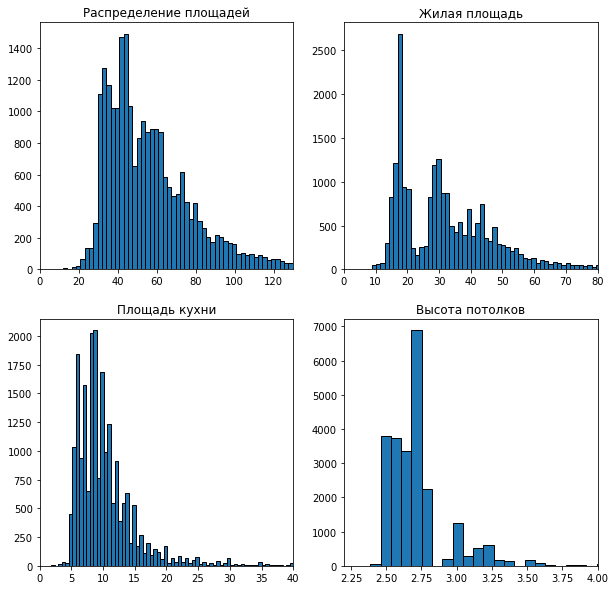

In [61]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(df['total_area'],bins = 400, ec = 'black')
ax[0,0].set(xlim=(0, 130))
ax[0,0].title.set_size(500)
ax[0,0].set_title('Распределение площадей')

ax[1,0].hist(df['kitchen_area'],bins = 200, ec = 'black')
ax[1,0].set(xlim=(0, 40))
ax[1,0].title.set_size(500)
ax[1,0].set_title('Площадь кухни')


ax[0,1].hist(df['living_area'],bins = 300, ec = 'black')
ax[0,1].set(xlim=(0, 80))
ax[0,1].title.set_size(500)
ax[0,1].set_title('Жилая площадь')

ax[1,1].hist(df['ceiling_height'],bins = 100, ec = 'black')
ax[1,1].set(xlim=(2.2, 4))
ax[1,1].title.set_size(500)
ax[1,1].set_title('Высота потолков')
plt.show()

 * ***Распределение площадей*** - В основном квартиры варируются от 40-60 метров, так же наблюдается пик в районе 80 метров. Скорее всего это обусловлено тем, что однокомнатные и двухкомнатные квартиры являются самыми популярными в крупных городах, так как являются более доступными для покупки.
 * ***Жилая площадь*** - прямо коррелируется, с общей площадью, такде есть пик от 15-20 метрах и следующий пик около 30 метров, так же как и по общей площади поэтому пики у этих двух графиков почти индентичны.
 * ***Площадь кухни*** - тут ситуация интереснее пиков намного больше, скорее всего это связано с тем что расположение кухни привязано к "мокрым точком" в планировке, то есть тех мест где есть вывод труб для обеспечения работы кухни их перенос крайне затруднителен, а так как в многоквартирных домах планировки плюс минус одни и те же то и пиков в площади кухни больше, так как они сильнее зависят от планировки квартиры нежеле чем жилая площадь
 * ***Высота потолков*** - как мы наблиюдали до этого при заполнение пропусков в ceiling_heights, чем ближе квартира к центру тем выше потолки.  В новостройках в основном застройщик строит дома где высота потолков не выше 3х метров, за исключением пентхаусов или элитного жилья. В отличие от центра Санкт-Петербурга где преимущественно доминирует застройка царских времен, где потолки были намного выше.

**График: rooms:**<a id='6.2'></a>

([к содержанию](#intro))

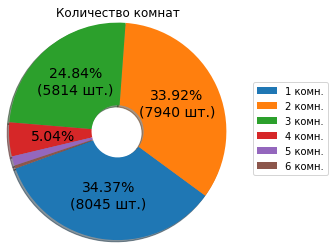

In [62]:

rooms_list = df.pivot_table(index='rooms', values='last_price', aggfunc='count')
rooms_list = rooms_list.query('rooms != 0 & rooms < 7')
def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    if value > 5000:
        return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    elif value > 1000:
        return "{:.2f}%".format(pct)
    else:
        return ''
data_for_pct = rooms_list
sum_rooms_list = rooms_list.sum()
ax= rooms_list.plot(kind='pie', y="last_price", radius=1.25, shadow=True, startangle=200, fontsize=14,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_rooms_list),
                                                            legend=True, labels=None,wedgeprops=dict(width=0.95))
ax.set_ylabel('')
ax.legend(['1 комн.', '2 комн.', '3 комн.', '4 комн.', '5 комн.', '6 комн.'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':10})
ax.set_title("Количество комнат")
plt.show()

**Вывод:**

Популярность 1 комн. – 3комн. квартир связана с тем, что данные квартиры являются более «ходовыми» и легче продаются как застройщиками так и на вторичном рынке, из-за того что эти квартиры зачастую покупают семьи с 1-2 детьми, пары или одинокие люди, а в нашей стране данная группа является доминирующуй . Кроме того 4ех комнатные квартиры не выгодно продавать застройщикам, так как в основном чем меньше метраж квартиры тем выше цена за метр.

**Графики: floor, floors_total:**<a id='6.3'></a>

([к содержанию](#intro))

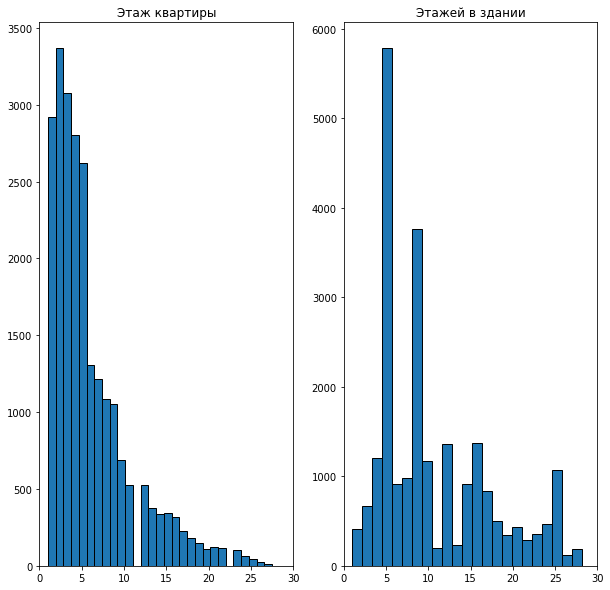

In [63]:
fig, ax = plt.subplots(1,2, figsize = (10,10))

ax[0].hist(df['floor'],bins = 35, ec = 'black')
ax[0].set(xlim=(0,30))
ax[0].title.set_size(500)
ax[0].set_title('Этаж квартиры')


ax[1].hist(df['floors_total'],bins = 50, ec = 'black')
ax[1].set(xlim=(0, 30))
ax[1].title.set_size(500)
ax[1].set_title('Этажей в здании')

plt.show()

**Вывод:**

**Floors** - Как мы видим преимущественно квартиры продаются с 1 - 5 этаж, это связано с тем что в Санкт-Петербурге и Ленинградской области (далее - ЛО) не очень высокая застройка преобладают 5 этажные здания и 9 этажные, строительство которых было распространено во времена СССР, что подтверждает информация на графике floors_total.

**Floors_total** - На этом графике выделяется как именно застраивался Санкт-Петербург и ЛО. Малое количество зданий до 5 этажейЮ скорее всего в центре города, далее самые распространенные здания времен СССР 5 и 9 этажные, и новые "небоскребы", которые преобладают в таких районах, как Мурино с высотой в 25 этажей.

**График: type_floor:**<a id='6.4'></a>

([к содержанию](#intro))

Text(0.5, 1.0, 'Тип этажа')

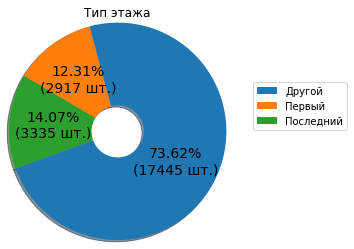

In [64]:

floor_list = df.pivot_table(index='type_floor', values='last_price', aggfunc='count')
def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    
data_for_pct = floor_list
sum_floor_list = floor_list.sum()
ax= floor_list.plot(kind='pie', y="last_price", radius=1.25, shadow=True, startangle=200, fontsize=14,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_floor_list),
                                                            legend=True, labels=None,wedgeprops=dict(width=0.95))
ax.set_ylabel('')
ax.legend(['Другой', 'Первый', 'Последний'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':10})
ax.set_title("Тип этажа")

**Вывод:**

**type_floor** - тут все закономерно, объявления с квартирами на первом и последнем этаже занимают 26% от общего количество квартир.

**График: last_price:**<a id='6.5'></a>

([к содержанию](#intro))

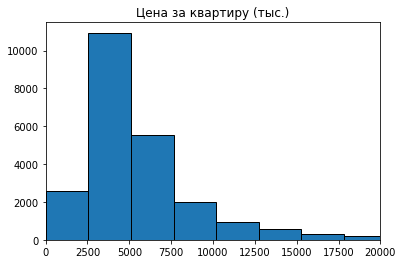

In [65]:
fig, ax = plt.subplots()
ax.hist(df['last_price'],bins = 300,ec = 'black')
ax.set(xlim=(0,20000))
ax.title.set_size(500)
ax.set_title('Цена за квартиру (тыс.)')
plt.show()

**Вывод:**

**last_price** - В Санкт-Петербурге и ЛО цена на квартиры в основном варируются от 2,5 млн. до 7,5 млн. рублей. Однако присутствуют и варианты для "богачей" от 20 млн. до 763 млн.

**Графики: cityCenters_nearest,airports_nearest,parks_nearest:**<a id='6.6'></a>

([к содержанию](#intro))

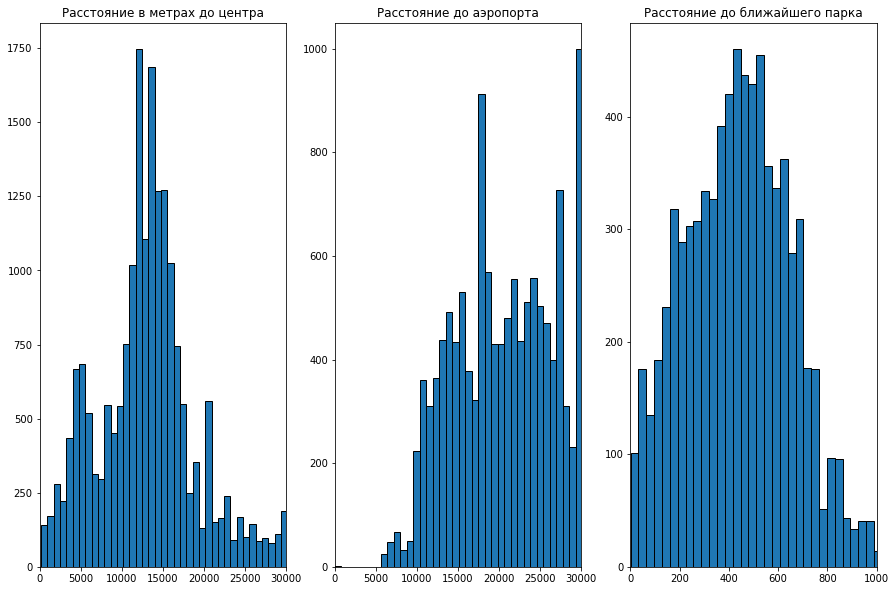

In [66]:
fig, ax = plt.subplots(1,3, figsize = (15,10))

ax[0].hist(df['cityCenters_nearest'],bins = 400, ec = 'black')
ax[0].set(xlim=(0,30000))
ax[0].title.set_size(500)
ax[0].set_title('Расстояние в метрах до центра')

ax[1].hist(df['airports_nearest'],bins = 400, ec = 'black')
ax[1].set(xlim=(0, 30000))
ax[1].title.set_size(500)
ax[1].set_title('Расстояние до аэропорта')

ax[2].hist(df['parks_nearest'],bins = 100, ec = 'black')
ax[2].set(xlim=(0, 1000))
ax[2].title.set_size(500)
ax[2].set_title('Расстояние до ближайшего парка')

plt.show()

**Вывод:**

**cityCenters_nearest** - Как мы видим в основном на сайте размещены квартиры из Санкт-Петербурга (до 17 км от центра), однако присутсвует и пик на отметки 20 км от центра куда входят новостройки находящиеся за Кадом вблизи Санкт-Петербурга, которые очень популярны среди приезжих.

**airports_nearest** - В основном квартиры расположены в 10 - 20 км от аэропорта, однако есть и квартиры, которые крайне отдалены от аэропорта. И почти отстутсвуют квартиры в пределах 5 км от аэропорта.

**parks_nearest** - Основная часть парков ( по которым у нас есть данные) находятся в радиусе 1 км от квартиры, что является хорошим результатом, так как в этом случае парк находится в пешей доступности и является преимуществом при продаже объекта.

**График:first_day_exposition:**<a id='6.7'></a>

([к содержанию](#intro))

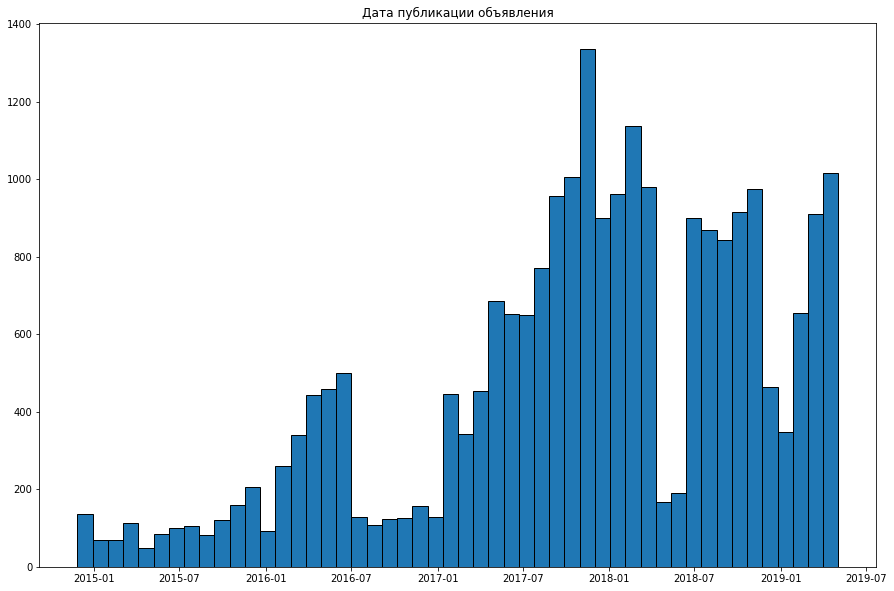

In [67]:
fig, ax = plt.subplots( figsize = (15,10))
ax.hist(df['first_day_exposition'],bins = 50,ec = 'black')
ax.title.set_size(500)
ax.set_title('Дата публикации объявления')
plt.show()

**Вывод:**

**first_day_exposition**- Как мы видим первые объявления появились в начале 2015 года и сервис с того времени сервис рос и набирал обороты. Однако каждый год наблюдается спад в первые месяца года, что может быть связано с народными "гулянями" и общей расслабленности в этот периуд.  В основном рост наблюдается в сентября, как и вся деловая активность.

**График:week_day,month:**<a id='6.8'></a>

([к содержанию](#intro))

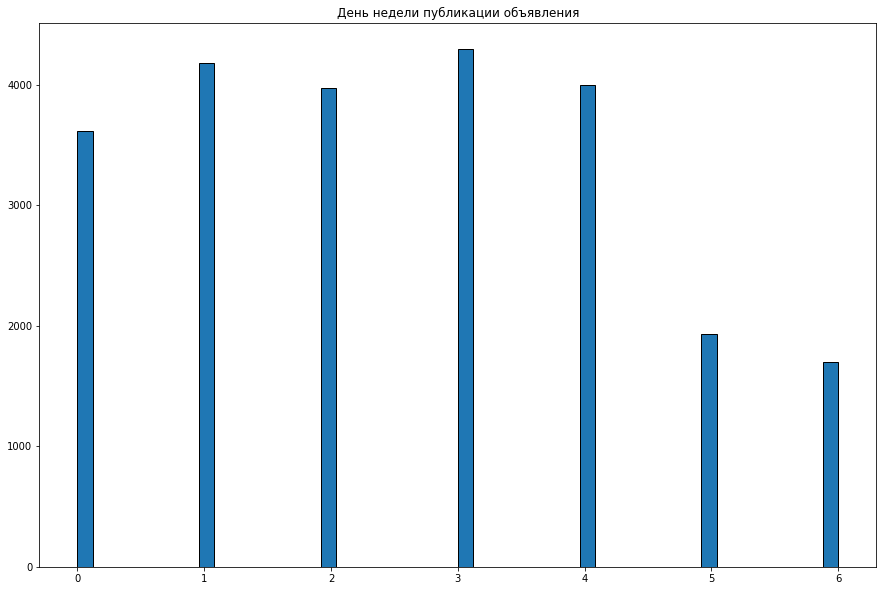

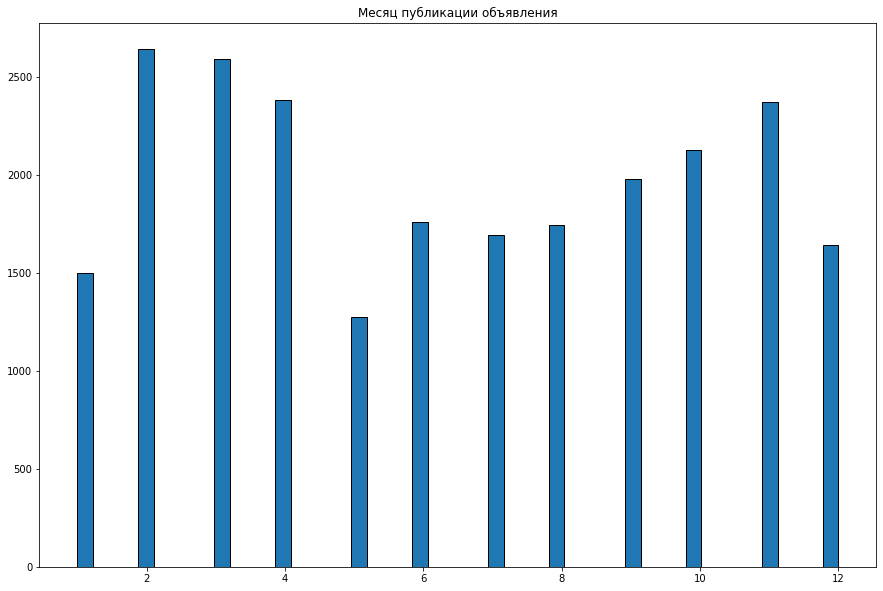

In [68]:
fig, ax = plt.subplots( figsize = (15,10))
ax.hist(df['weekday'],bins = 50,ec = 'black')
ax.title.set_size(500)
ax.set_title('День недели публикации объявления')
plt.show()
fig, ax = plt.subplots( figsize = (15,10))
ax.hist(df['month'],bins = 50,ec = 'black')
ax.title.set_size(500)
ax.set_title('Месяц публикации объявления')
plt.show()

**Вывод:**

**weekday** - в основном объявления размещают в будние дни равномерно, в выходные наблюдается спад. Возможно это связано с деловой активностью людей или работой агентств по недвижимости, которые более активные в будние дни

**month** - Самыми активными месяцами являются февраль,март,апрель, потом идет резкий спад и восстанавливается активность в начале осени. Возможно такая низкая активность в  периуд весна-лето, может быть связана с тем что люди разъезжаются по отпускам

**График: days_exposition:**<a id='6.9'></a>

([к содержанию](#intro))

In [69]:
df['days_exposition'].describe()

count    20516.000000
mean       180.898713
std        219.735568
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

TypeError: boolean value of NA is ambiguous

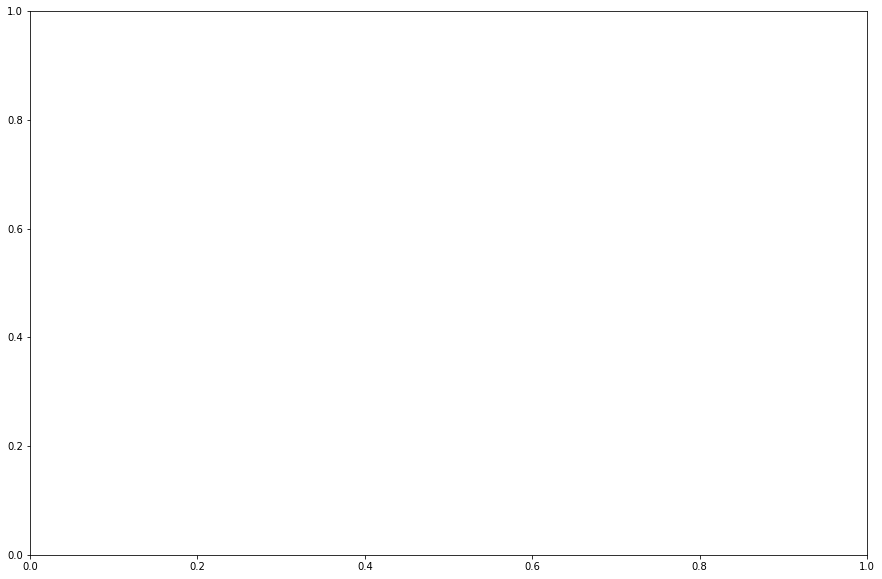

In [105]:
fig, ax = plt.subplots( figsize = (15,10))
ax.hist(df['days_exposition'],ec = 'black')
ax.title.set_size(500)
ax.set(xlim=(0,500))
ax.set_title('Дата публикации объявления')
plt.show()

В основном объявления висит на сайте в течение 100 дней, однако есть и "долгожители", которые продержались больше года. Посмотрим какие есть выбивающеся значения, для рассмотрения графика поближе и выявления закономерности.

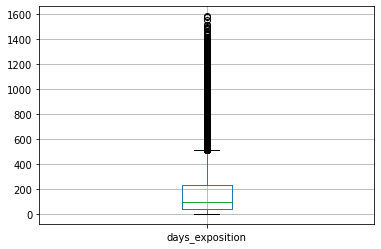

In [106]:
df.boxplot(column='days_exposition')
plt.show()

Рассмотрим объявление, которые закрывались в течение 300 дней:

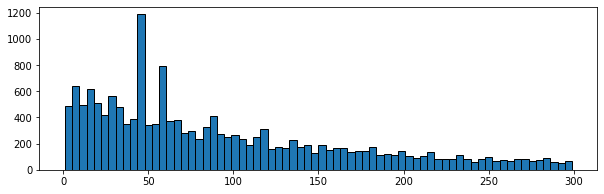

In [107]:
df.query('days_exposition<300')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black', grid = False)
plt.show()

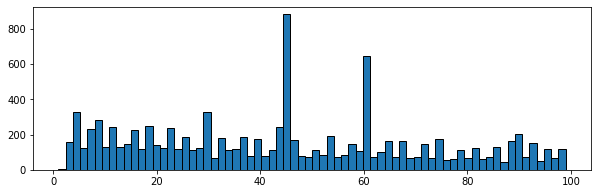

In [108]:
df.query('days_exposition<100')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black', grid = False)
plt.show()

Как мы видим, есть пики в районе 45 дней и 60 дней возможно это связано с тем что в этот периуд объявления автоматически закрываются в случае неактивности пользователя на сайте, для уменьшения захломления сайта не актуальными объявлениями. Так как если бы хорошие объекты уходили бы в срок до двух месяцев график был бы более плавным.

Опираясь на построенные графики будем считать, что быстрые продажи возьмем те, которые продаются до 45 дней (первый квартиль), долгими продажами являются объявления провисевшие более 232 дней (третий квартиль)

**Вывод к параграфу**<a id='6.10'></a>

([к содержанию](#intro))

 * **Распределение площадей** - В основном квартиры варируются от 40-60 метров;
 * **Жилая площадь** - в среднем 15-20 метров;
 * **Площадь кухни** - в среднем от 5-10 метров;
 * **Высота потолков** - в центре выше 3, в основном от 2.4 до 2.7;
 * **Количество комнат** - чаще всего в объявлениях встречаются 1,2 и 3 комнатные квартиры;
 * **Тип этажа*** - 12% процентов объявлений о продаже первого этажа, 14% о последнем и 74% остальные;
 * **cityCenters_nearest** - в основном на сайте размещены квартиры из Санкт-Петербурга (до 17 км от центра);
 * **airports_nearest** - В основном квартиры расположены в 10 - 20 км от аэропорта;
 * **parks_nearest** - Основная часть парков ( по которым у нас есть данные) находятся в радиусе 1 км от квартиры;
 * **first_day_exposition** - C начало существования сервиса количество объявлений увеличивается;
 * **days_exposition** - В основном объявления закрываются в течение 100 дней, и скорее всего присутсвует автоматические закрытие неактивных объявлений на 45 и 60 день;

# 7. Анализ факторов влияющих на общую стоимость объекта:<a id='7'></a>

([к содержанию](#intro))

  В данном разделе мы рассмотрим следующие показатели влияющие на общую стоимость объекта и проанализируем их корреляцию:
  
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - количество комнат;
  - тип этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

**Зависимость цены от площади объекта:**<a id='7.1'></a>

([к содержанию](#intro))


In [109]:
df['living_area'].describe()

count    21794.000000
mean        34.459686
std         22.030621
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

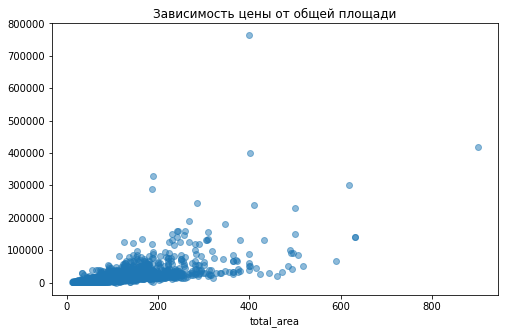

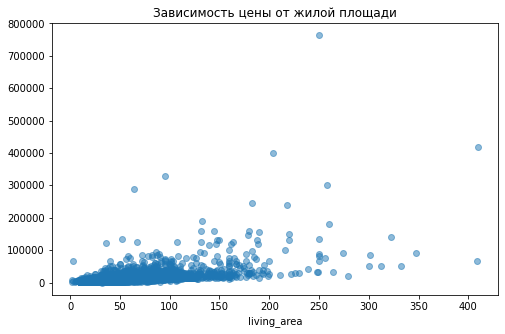

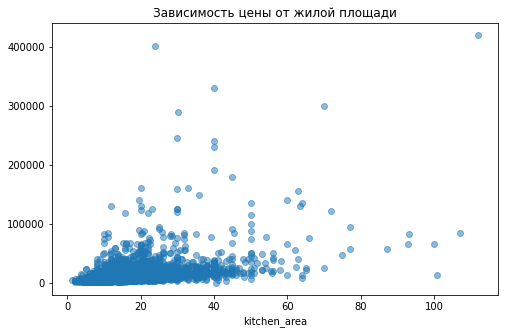

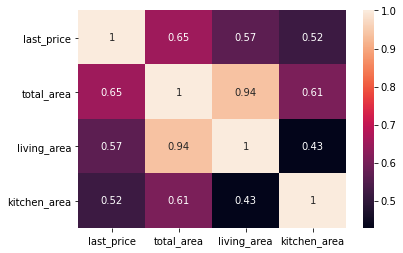

In [110]:

df.plot(x='total_area', y='last_price', title='Зависимость цены от общей площади', style='o', figsize=(8, 5),
                                     legend= None, alpha=.5)
plt.show()


df.plot(x='living_area', y='last_price', title='Зависимость цены от жилой площади', style='o', figsize=(8, 5),
                                     legend= None, alpha=.5)
plt.show()

df.plot(x='kitchen_area', y='last_price', title='Зависимость цены от жилой площади', style='o', figsize=(8, 5),
                                     legend= None, alpha=.5)
plt.show()
sns.heatmap(df[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr(), annot=True);

Теперь уберем аномальные значения и посмотрим как станут выглядить наши графики и корреляция:

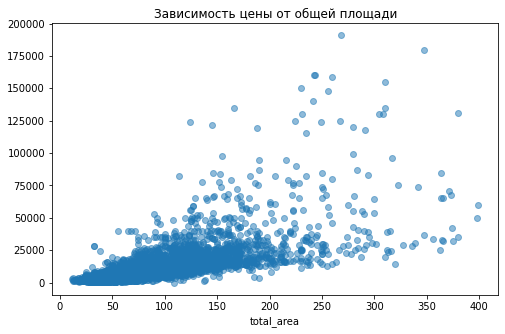

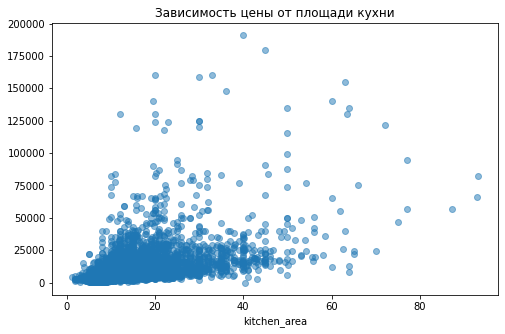

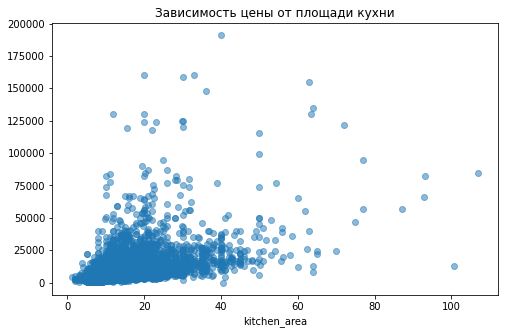

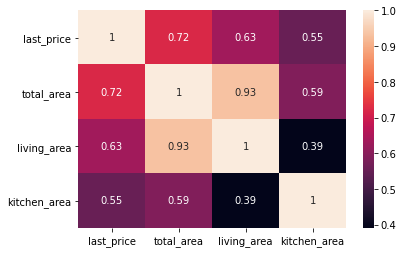

In [111]:

df.query('total_area < 400 and last_price < 200000').plot(x='total_area', y='last_price', title='Зависимость цены от общей площади', style='o', figsize=(8, 5),
                                     legend= None, alpha=.5)
plt.show()


df.query('kitchen_area < 100 and last_price < 200000').plot(x='kitchen_area', y='last_price', title='Зависимость цены от площади кухни', style='o', figsize=(8, 5),
                                     legend= None, alpha=.5)
plt.show()

df.query('living_area < 250 and last_price < 200000').plot(x='kitchen_area', y='last_price', title='Зависимость цены от площади кухни', style='o', figsize=(8, 5),
                                     legend= None, alpha=.5)
plt.show()
sns.heatmap(df.query('last_price < 200000 and kitchen_area < 100 and living_area < 250 ')[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr(), annot=True);

**Вывод:**
Расположим наши показатели согласну уровню уменьшения корреляции с общей ценой объекта:

**1. total_area** - корреляция составляет 0.72 и среди данных факторов является самым влиятельным на значение общей стоимости квартиры. И это не удивительно, так как большинство покупателей в первую очередь ориентируется именно на этот параметр при выборе. Кроме того чем больше площадь тем выше цена, а жилая и кухонная площадь входят в этот параметр, и соответственно не могут иметь большего влияния.

**2.living_area** - корреляция составляет 0.63 и занимает почетное второе место. Тут предположу, что человек в основном проводит свое время именно в жилой площади нежели чем на кухне, за исключением поваров и "отчаянных домохозяек/домохозяев" соответсвтенно этот показатель является вторым по важности.

**3.kitchen_area** - последний по влиянию, но не по значению. Корреляция составляет 0.55, что плавно вытекает из предыдущего анализа.

Таким образом эти три фактора существенно влияют на конечную стоимость объекта

**Зависимость цены от количества комнат:**<a id='7.2'></a>

([к содержанию](#intro))

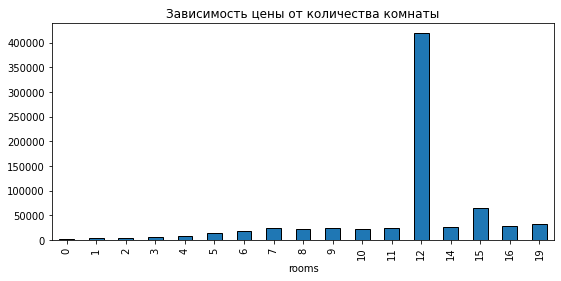

In [112]:
rooms_filtered = df.groupby('rooms').median()['last_price'].reset_index()
plot = rooms_filtered.plot(x='rooms', y="last_price", kind='bar', ec='black', 
                            title='Зависимость цены от количества комнаты', legend=None, 
                            figsize=(9,4))

Тут наблюдаем выбивающиеся значение, так как квартир с 12 комнатами крайне мало, очистим наш график от этих данных.

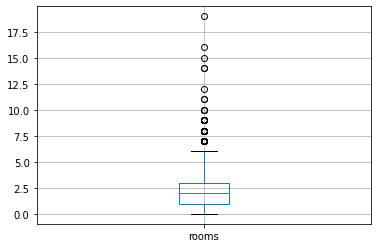

In [113]:
df.boxplot(column='rooms')
plt.show()

Расмотрим влияние цены в квартирах до 7 комнат:

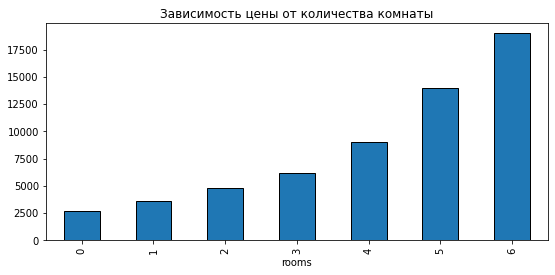

In [114]:
rooms_filtered = df.query('rooms <7 ').groupby('rooms').median()['last_price'].reset_index()
plot = rooms_filtered.plot(x='rooms', y="last_price", kind='bar', ec='black', 
                            title='Зависимость цены от количества комнаты', legend=None, 
                            figsize=(9,4))
plt.show()

**Вывод:**

Цена квартиры растет в зависимости от количества комнат.

Предположу, что многие покупатели  в первую очередб обращают внимание именно на этот показатель. Предположу что квартира в 100 метров с 2 комнатами, не так интересна чем 100 метровая квартира с 3 комнатами, ведь основная группа лиц для покупки недвижимости такого метража не одиночки, а семьи и в основном им требуется больше двух комнат.

**Зависимость цены от этажа:**<a id='7.3'></a>

([к содержанию](#intro))

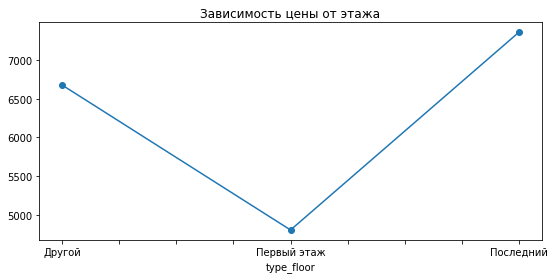

              last_price
type_floor              
Другой       6675.523088
Первый этаж   4803.56023
Последний    7358.734297


In [115]:
type_floor_filtered = df.pivot_table(index = 'type_floor', values = 'last_price')
plot = type_floor_filtered.plot(kind='line', style ='o-',
                            title='Зависимость цены от этажа', legend=None, 
                            figsize=(9,4), )

plt.show()
print(type_floor_filtered)

***Вывод:***

В данном случае построить корреляцию не получилось из-за того что в столбце type_flor значение str. Однако мы можем наблюдать тенденцию, что квартиры на первых этажах являются самыми дешевыми, из всех. Связано это с тем, что многие не хотят селиться на этих этажах в связи с повышенным уровнем опасности, отсутствия вида и шума. Самыми дорогыми являются квартиры на последних этажах, так как многие из них видовые плюс в элитной недвижимости пентхаусы всегда располагаются на последних этажах, что в свою очередб влияет на среднюю цену объектов на последних этажах.

**Зависимость цены от даты публикации:**<a id='7.4'></a>

([к содержанию](#intro))

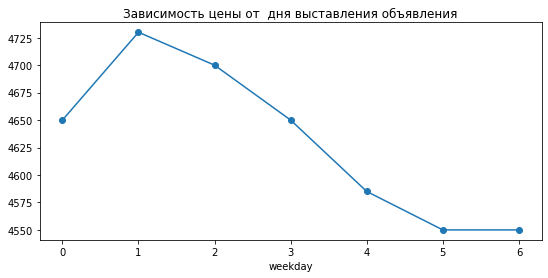

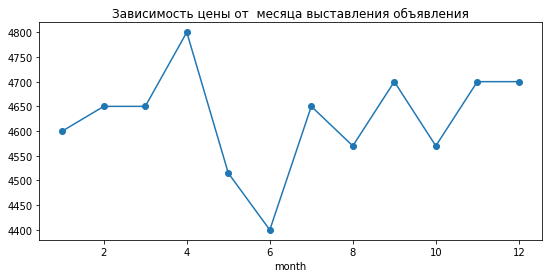

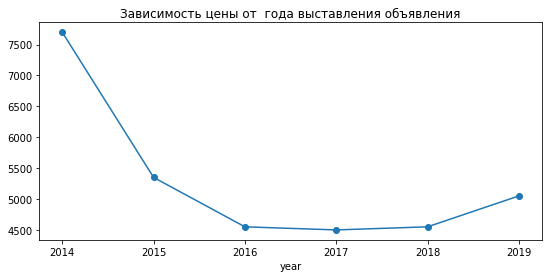

In [116]:
weekday_filtered = df.groupby('weekday').median()['last_price'].reset_index()
plot = weekday_filtered.plot(x='weekday', y="last_price", kind='line', style='o-', 
                            title='Зависимость цены от  дня выставления объявления', legend=None, 
                            figsize=(9,4))
plt.show()

month_filtered = df.groupby('month').median()['last_price'].reset_index()
plot = month_filtered.plot(x='month', y="last_price", kind='line', style='o-', 
                            title='Зависимость цены от  месяца выставления объявления', legend=None, 
                            figsize=(9,4))
plt.show()

year_filtered = df.groupby('year').median()['last_price'].reset_index()
plot = year_filtered.plot(x='year', y="last_price", kind='line', style='o-', 
                            title='Зависимость цены от  года выставления объявления', legend=None, 
                            figsize=(9,4))
plt.show()

In [117]:
df.query('year == 2014')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,Distance_from_center,price_for_metre,weekday,month,year,type_floor,km_from_center
98,11,11700.0,80.0,2014-12-10,3,2.708164,5.0,55.1,3,False,...,0,<NA>,831,в пределах города,146250,2,12,2014,Другой,9.0
260,8,17250.0,102.4,2014-12-09,3,2.708164,8.0,53.2,3,False,...,0,<NA>,<NA>,в пределах города,168457,1,12,2014,Другой,11.0
398,7,12789.0,79.3,2014-12-09,2,3.000000,8.0,43.1,5,False,...,0,<NA>,1345,в пределах города,161273,1,12,2014,Другой,11.0
411,1,40662.0,151.0,2014-12-09,3,2.708164,8.0,85.0,3,False,...,3,100,594,в пределах города,269284,1,12,2014,Другой,6.0
512,8,6260.0,43.3,2014-12-09,1,2.708164,8.0,NaN,5,False,...,3,303,1155,в пределах города,144572,1,12,2014,Другой,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,10,4850.0,69.0,2014-12-15,3,2.708164,16.0,43.4,1,False,...,0,<NA>,1032,в пределах города,70289,0,12,2014,Первый этаж,13.0
23034,0,4100.0,88.0,2014-12-10,4,2.641825,5.0,60.7,4,False,...,<NA>,<NA>,1202,за Кадом,46590,2,12,2014,Другой,59.0
23248,5,4900.0,80.0,2014-12-25,3,2.708164,15.0,47.0,14,False,...,<NA>,<NA>,1187,в пределах города,61250,3,12,2014,Другой,14.0
23426,17,8778.0,47.5,2014-12-29,1,3.000000,7.0,NaN,4,False,...,3,204,1360,в пределах города,184800,0,12,2014,Другой,10.0


**Вывод:**

**weekday -**  Как ни странно, но именно в понедельник и вторник выставляют самые дорогие квартиры, а к концу недели идет спад. Интересная закономерность, возможно это связано с тем, что дорогой недвижимостью чаще занимаются риэлторы, так как владельци дорогих квартир могут позволить себе платить им комиссию в связи с чем с началом рабочий недели они выкладывают те объекты, коториые получили в выходные дни. А те кто имеют квартиры по проще чаще выкладывают их в выходные, так как им проще это сделать в свободное от работы время. Однако это гиппотеза требует отдельного исследования.

**month -** В данном случае корреляция крайне низкая и близиться к нулю думая месяц продажи квартиры не особенно влияет на цену, возможно такие пики появляются из-за различной экономической ситуации.

**year -** После 2014 года наблюдается резкий спад цен на недвижимость возможно это связано с резким ростом курса доллара в то время. Однако после этого корреляция года и цены составляет лишь ничтожные 0.1. Так что можно считать, что данный показатель не особо влияет на цену 

***Вывод к параграфу:*** <a id='7.5'></a>

([к содержанию](#intro))

Проанализировав следующие показатели влияющие на конечную цену квартиры, больше всего влияет стоимость квадратного метра, а также размер площади и количество комнат



 # 8. Подсчет цены за квадратный метр в 10 самых популярных населенных пунктах <a id='8'></a>

([к содержанию](#intro))

Для начала выявим населеные пункты с самыми большим количествам объявлений.

In [118]:
top_ten = df['locality_name'].value_counts().head(10).to_frame()
top_ten

,locality_name
санкт-петербург,15719
мурино,590
кудрово,472
шушары,440
всеволожск,398
пушкин,369
колпино,338
парголово,327
гатчина,307
выборг,237


Теперь посчитаем среднюю цену за квадратный метр в этих населенных пунктах.

In [119]:

top_ten_price = df.query('locality_name in @top_ten.index').pivot_table(index = 'locality_name', values = 'price_for_metre').astype(int)
top_ten_price.sort_values(by ='price_for_metre',ascending=False)

,price_for_metre
locality_name,
санкт-петербург,114817
пушкин,103125
кудрово,95323
парголово,90176
мурино,86087
шушары,78677
колпино,75423
гатчина,68745
всеволожск,68654


In [120]:
df.query('locality_name =="выборг"')['cityCenters_nearest']

69       121217.206326
97       121217.206326
255      121217.206326
296      121217.206326
322      121217.206326
             ...      
23023    121217.206326
23079    121217.206326
23548    121217.206326
23622    121217.206326
23682    121217.206326
Name: cityCenters_nearest, Length: 237, dtype: float64

**Вывод к параграфу:** <a id='8.1'></a>

([к содержанию](#intro))

Неудивительно что первое место занял Санкт-Петербург со средней стоимостью 114 817 руб. за кв.м. В тройку лидеров так-же вошли г. Пушкин 26 км от центра со средней стоимостью 103 125 руб. за кв.м и город новостроек Курдово с отдаленостью 14 км от центра и средней стоимостью 95 323 руб за кв.м.

Самым же бюджетным вариантом размещения в ЛО оказались г. Гатчина, г. Всеволожск и г. Выборг.

# 9 . Подсчет стоимости каждого километра в Санкт-Петербурге <a id='9'></a>

([к содержанию](#intro))

In [121]:
Saint_Petersburg = df.query('locality_name =="санкт-петербург"')
price_for_km = Saint_Petersburg.pivot_table(values ='price_for_metre',index = 'km_from_center', aggfunc ='mean').astype(int)
price_for_km

,price_for_metre
km_from_center,
0.0,245833
1.0,171985
2.0,157848
3.0,121386
4.0,133281
5.0,140509
6.0,151011
7.0,156176
8.0,124875


Чем ближе к центру тем дороже квадратный метр, это довольно логично, однако появляются и нарушение данной гиппотезы посмотрим с чем это связано

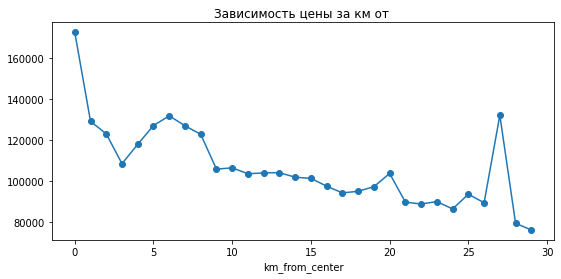

Корреляция цены от года выставления объявления: 
                  km_from_center  price_for_metre
km_from_center         1.000000        -0.379524
price_for_metre       -0.379524         1.000000


In [122]:
price_for_km = Saint_Petersburg.groupby('km_from_center')['price_for_metre'].median()
plot = price_for_km.plot(x='km_from_center', y="price_for_metre", kind='line', style='o-',
                            title='Зависимость цены за км от ', legend=None, 
                            figsize=(9,4))
plt.show()
print('Корреляция цены от года выставления объявления:','\n',Saint_Petersburg.pivot_table(index = 'last_price', values = ['price_for_metre','km_from_center'],aggfunc ='median').corr())

Посмотрим аномальные значения на 27 км и как он влияет на общую корреляцию

In [123]:
Saint_Petersburg.query('km_from_center == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,Distance_from_center,price_for_metre,weekday,month,year,type_floor,km_from_center
748,13,14350.0,74.0,2017-11-28,2,3.100000,5.0,30.0,3,False,...,0,<NA>,128,за Кадом,193918,1,11,2017,Другой,27.0
5961,6,2250.0,32.0,2018-02-27,1,2.641825,2.0,16.5,2,False,...,0,<NA>,178,за Кадом,70312,1,2,2018,Последний,27.0


In [124]:

Saint_Petersburg.query('km_from_center < 25').pivot_table(index = 'last_price', values = ['price_for_metre','km_from_center'],aggfunc ='median').corr()

,km_from_center,price_for_metre
km_from_center,1.000000,-0.386891
price_for_metre,-0.386891,1.000000


**Вывод к параграфу:** <a id='9.1'></a>

([к содержанию](#intro))

В основном стоимость квадратного метра выше чем ближе объект находится к центру, это довольно логично и подтверждается корреляция -0.38. Есть конечно и исключение из правил, но скорее тут уже свою лепту вносят другие факторы, которые больше влияют на ценообразование например количество комнат, метраж и этаж, так же я думаю влияет и уровень дома, однако в нашей таблице нет данных о классе дома.

# 10. Общие выводы <a id='10'></a>

([к содержанию](#intro))

Исходя из данных представленных в данном датасете можно сделать следующие выводы:
* Цена на квартиу в Санкт-Петербурге и ЛО в среднем от 2.5 до 7.5 млн. рублей.
* Застройка достаточно не высокая чаще всего встречаются здания высотой от 5 до 9 этажей, однако в новых районах превалируют здания высотой свыше 20 этажей
* Средняя высота потолка колеблиться в районе 3 - 3.5 метров в центре и  2.2 - 2.7 метров за пределами центра
* Самые популярные это 1,2 и 3 комнатные квартиры
* Чаще всего продают квартиры не на первом и не на последнем этаже.
* Со старта сервиса растет количество объявлений
* Больше всего на общую стоимость квартиры влияет количество комнат и площадь
* В основном на сайте представлены объявления о квартирах находящихся в Санкт-Петербурге за пределами центра
* Чем дальше от центра Санкт-Петербурга тем дешевле стоимость квадратного метра
* Самая дорогая недвижимостьв Санкт-Петербурге, самая дешевая в г. Выборг
* Сайт автоматически закрывает неактивные объявления на 45 и 60 день
* В основном объявления висят на сайте в течение 180 дней